Earthquake Prediction Model with Machine Learning

Importing Necessary Libraries:
Begin by importing the required libraries for data manipulation, visualization, and machine learning algorithms such as pandas, numpy, matplotlib, scikit-learn, and keras.

In [342]:
#importing necessary files required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from mpl_toolkits.basemap import Basemap

Loading and Reading the Dataset:
Load the earthquake dataset into a DataFrame and read its contents to understand the data structure and features.


In [343]:
# reading the file "database.csv" in to a dataframe named "dataframe"
dataframe=pd.read_csv("database.csv")
dataframe

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [344]:
# analyzing the data 
# number of null values in columns present
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [345]:
#checking if in required columns null value is present
dataframe.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [346]:
#getting all columns name
dataframe.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [347]:
#removing those columns which are not required
dataframe=dataframe.drop(columns=['Type','Depth Error','Depth Seismic Stations','Magnitude Type','Magnitude Error', 'Magnitude Seismic Stations', 
                        'Azimuthal Gap','Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
                        'Source', 'Location Source', 'Magnitude Source', 'Status'])

Scaling Data:
Scale the data, particularly the date and time, by converting them to Unix time (seconds since the Unix epoch) to prepare them for model input.

In [348]:
# Combine 'Date' and 'Time' columns into a single column
datetime_str = dataframe['Date'] + ' ' + dataframe['Time']

# Convert the combined datetime string column to datetime objects
datetime_objs = pd.to_datetime(datetime_str, errors='coerce')

# Convert datetime objects to Unix timestamps (in seconds)
timestamps = (datetime_objs - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)

# Add Unix timestamps as a new column to the dataframe
dataframe['New_Time'] = timestamps

# Drop rows with NaT (indicating invalid datetime strings)
final_data = dataframe.dropna(subset=['New_Time'])

# Print the resulting dataframe
print(final_data)


             Date      Time  Latitude  Longitude   Depth  Magnitude  \
0      01/02/1965  13:44:18   19.2460   145.6160  131.60        6.0   
1      01/04/1965  11:29:49    1.8630   127.3520   80.00        5.8   
2      01/05/1965  18:05:58  -20.5790  -173.9720   20.00        6.2   
3      01/08/1965  18:49:43  -59.0760   -23.5570   15.00        5.8   
4      01/09/1965  13:32:50   11.9380   126.4270   15.00        5.8   
...           ...       ...       ...        ...     ...        ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941   12.30        5.6   
23408  12/28/2016  09:13:47   38.3777  -118.8957    8.80        5.5   
23409  12/28/2016  12:38:51   36.9179   140.4262   10.00        5.9   
23410  12/29/2016  22:30:19   -9.0283   118.6639   79.00        6.3   
23411  12/30/2016  20:08:28   37.3973   141.4103   11.94        5.5   

           New_Time  
0     -1.576305e+08  
1     -1.574658e+08  
2     -1.573556e+08  
3     -1.570938e+08  
4     -1.570264e+08  
...            

In [349]:
dataframe['New_Time']

0       -1.576305e+08
1       -1.574658e+08
2       -1.573556e+08
3       -1.570938e+08
4       -1.570264e+08
             ...     
23407    1.482913e+09
23408    1.482916e+09
23409    1.482929e+09
23410    1.483051e+09
23411    1.483129e+09
Name: New_Time, Length: 23412, dtype: float64

In [350]:
# Assuming 'dataframe' is your DataFrame and 'New_time' is the column containing time data
mode_of_time = dataframe['New_Time'].mode()[0]  # Get the mode value

# Replace missing values in 'New_Time' column with the mode value
dataframe.loc[dataframe['New_Time'].isna(), 'New_Time'] = mode_of_time

In [351]:
# Assuming 'dataframe' is your DataFrame and you want to drop the 'Time' column
dataframe = dataframe.drop(columns=['Time','Date'])

# Display information about the DataFrame after dropping the 'Time' column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   23412 non-null  float64
 1   Longitude  23412 non-null  float64
 2   Depth      23412 non-null  float64
 3   Magnitude  23412 non-null  float64
 4   New_Time   23412 non-null  float64
dtypes: float64(5)
memory usage: 914.7 KB


Data Visualization:
Visualize the earthquake data on a world map to depict the frequency and distribution of earthquakes based on latitude, longitude, and magnitude.

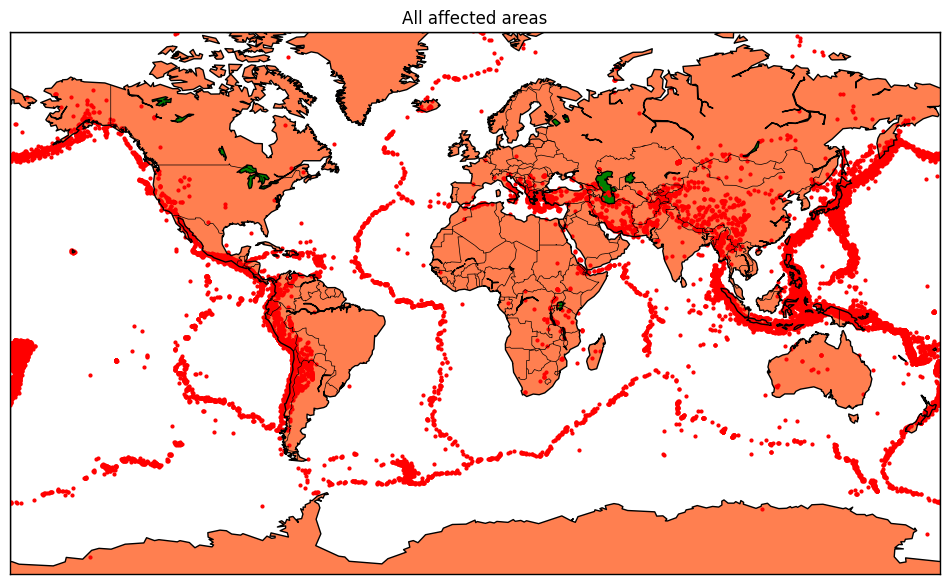

In [352]:
# Creating a Basemap object with specific projection and boundary coordinates
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')

longitudes = dataframe["Longitude"].tolist()
latitudes = dataframe["Latitude"].tolist()

# Converting latitude and longitude coordinates to map projection coordinates
x,y = m(longitudes, latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")   #giving titles

# Plotting earthquake locations on the map
m.plot(x, y, "o", markersize = 2, color = 'red')
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='green')
m.drawmapboundary()
m.drawcountries()
plt.show()

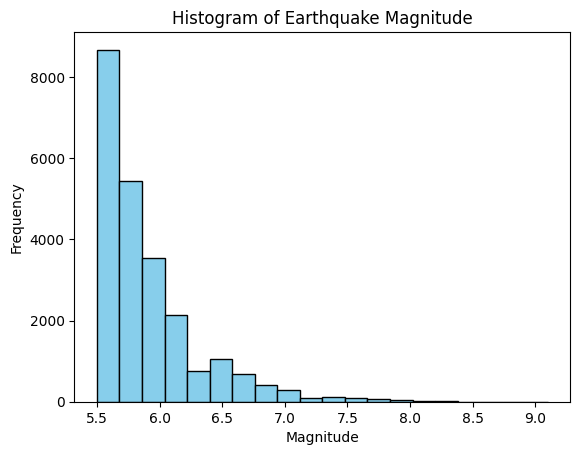

In [353]:
import matplotlib.pyplot as plt

#plotting hist graph for "Magnitude"
plt.hist(dataframe['Magnitude'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Earthquake Magnitude')
plt.show()

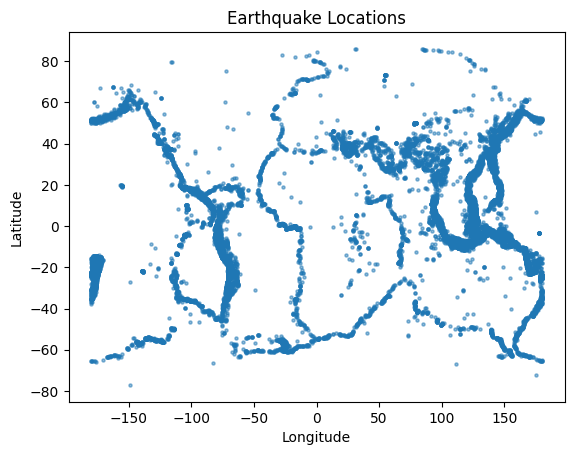

In [354]:
#using scatter plot to see the eathquake locations
plt.scatter(dataframe['Longitude'], dataframe['Latitude'], s=5, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Locations')
plt.show()

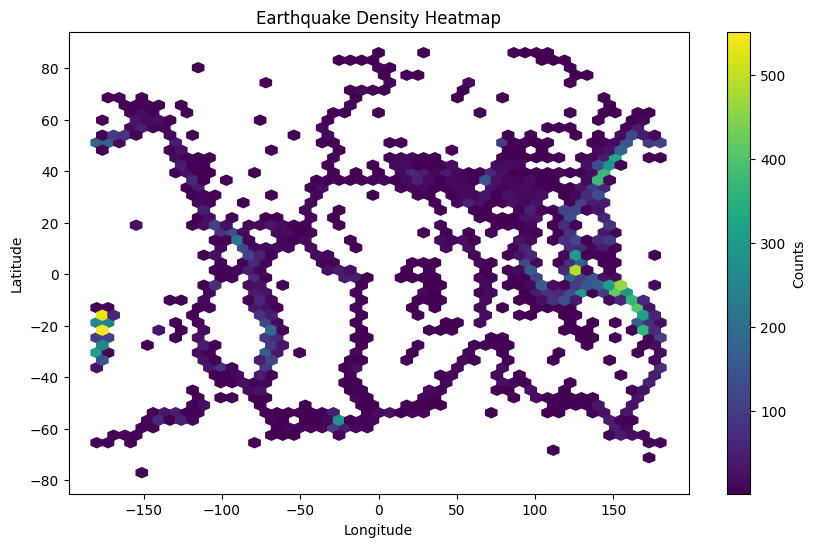

In [355]:
#plotting hexbin graph for analyzing earthquake density heatmap
plt.figure(figsize=(10, 6))
plt.hexbin(dataframe['Longitude'], dataframe['Latitude'], gridsize=50, cmap='viridis', mincnt=1)
plt.colorbar(label='Counts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Density Heatmap')
plt.show()


In [356]:
dataframe

,Latitude,Longitude,Depth,Magnitude,New_Time
0,19.2460,145.6160,131.60,6.0,-1.576305e+08
1,1.8630,127.3520,80.00,5.8,-1.574658e+08
2,-20.5790,-173.9720,20.00,6.2,-1.573556e+08
3,-59.0760,-23.5570,15.00,5.8,-1.570938e+08
4,11.9380,126.4270,15.00,5.8,-1.570264e+08
...,...,...,...,...,...
23407,38.3917,-118.8941,12.30,5.6,1.482913e+09
23408,38.3777,-118.8957,8.80,5.5,1.482916e+09
23409,36.9179,140.4262,10.00,5.9,1.482929e+09
23410,-9.0283,118.6639,79.00,6.3,1.483051e+09


Splitting the Dataset:
Divide the data into input features (X) and target variables (y) for model training and testing. Use a train-test split with a validation set, typically 80% training and 20% testing data.

In [357]:
#splitting the data into features and target variable
X = final_data[['New_Time', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Neural Network Model:
Create a neural network model using Keras with specified layers, nodes, and activation functions to predict earthquake magnitude and depth based on input features.

Hyperparameter Tuning:
Define hyperparameters with multiple options (e.g., batch size, epochs, optimizer) to find the best-fit model configuration using techniques like grid search or random search.

Finding the Best Fit Model:
Use hyperparameter tuning techniques to find the best-fit model configuration that maximizes performance metrics such as accuracy or mean squared error.

In [358]:
# Initializing a Sequential model
model = Sequential()

# Adding the first Dense layer (hidden layer) with 16 neurons and ReLU activation function
# Input shape is specified as (3,), indicating the shape of the input data
model.add(Dense(16, activation='relu', input_shape=(3,)))

# Adding the second Dense layer (hidden layer) with 16 neurons and ReLU activation function
model.add(Dense(16, activation='relu'))

# Adding the third Dense layer (hidden layer) with 2 neurons and softmax activation function
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])

C:\Users\kusha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [359]:
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9824 - loss: 0.5039 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 2/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9801 - loss: 0.5045 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 3/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9808 - loss: 0.5036 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 4/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9806 - loss: 0.5041 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 5/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9787 - loss: 0.5042 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 6/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9790 - loss: 0.5044 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 7/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9817 - loss: 0.5037 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 8/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9807 - loss: 0.5

Evaluation on Test Data:
Evaluate the best-fit model on the test data to assess its predictive capabilities. Measure metrics such as loss (e.g., mean squared error) and accuracy to determine the model's effectiveness in earthquake prediction.

In [360]:
# Evaluating the model on the test data
[test_loss, test_acc] = model.evaluate(X_test, y_test)

# Printing the evaluation result
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9833 - loss: 0.5038
Evaluation result on Test Data : Loss = 0.5038275718688965, accuracy = 0.9814181923866272
